<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans

# Datos de ejemplo
datos = [[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]

# Crear el modelo de clustering
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(datos)

# Obtener las etiquetas de los clusters asignados a cada punto
etiquetas = kmeans.labels_

# Obtener los centroides de los clusters
centroides = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:", etiquetas)
print("Centroides de los clusters:", centroides)


Etiquetas de los clusters: [1 1 2 2 1 0]
Centroides de los clusters: [[ 9.         11.        ]
 [ 1.16666667  1.46666667]
 [ 6.5         8.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Silueta
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Datos de ejemplo
datos_quinolinas = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
datos_esteroides = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]

# Algoritmo de K-Means
kmeans = KMeans(n_clusters=2)
etiquetas_kmeans = kmeans.fit_predict(datos_esteroides)
silueta_kmeans = silhouette_score(datos, etiquetas_kmeans)

# Algoritmo de DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
etiquetas_dbscan = dbscan.fit_predict(datos)
silueta_dbscan = silhouette_score(datos, etiquetas_dbscan)

# Algoritmo de Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
etiquetas_agglomerative = agglomerative.fit_predict(datos)
silueta_agglomerative = silhouette_score(datos, etiquetas_agglomerative)

# Imprimir los resultados
print("Coeficiente de Silueta (K-Means):", silueta_kmeans, etiquetas_kmeans)
print("Coeficiente de Silueta (DBSCAN):", silueta_dbscan, etiquetas_dbscan)
print("Coeficiente de Silueta (Agglomerative Clustering):", silueta_agglomerative, etiquetas_agglomerative)


ValueError: ignored

In [7]:
import pandas as pd

# Lista de strings original
lista_strings = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
lista_strings_estero = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]
lista_ordenada_estero = sorted(lista_strings_estero, key=float)
# Crear un DataFrame a partir de la lista de strings
datos = pd.DataFrame({"string": lista_strings})
datos_estero = pd.DataFrame({"string": lista_ordenada_estero})
datos_estero["Etiqueta"] = [i for i in range(1,len(lista_ordenada_estero)+1)]
print(lista_ordenada_estero)
# Realizar mapeo de las etiquetas a valores numéricos
mapeo = {
    "<=62": 1,
    "62-125": 2,
    "125-250": 3,
    ">250": 4
}
#mapeo2 = {x: i+1 for x in lista_strings_estero.sort(key=float)}

# Extraer los números de los strings
datos["numero"] = datos["string"].str.extract(r"(\d+)")
# Reemplazar las etiquetas por los valores numéricos correspondientes
#datos["etiqueta"] = datos["string"].str.extract(r"\((.+)\)").replace(mapeo)
datos["etiqueta"]=[1,4,4,1,2,4,4,2,3,4,1,2]
# Imprimir los datos transformados
#datos
datos_estero

['5.322', '6.146', '6.204', '6.342', '6.362', '6.431', '6.633', '6.944', '6.996', '7.146', '7.146', '7.204', '7.380', '7.462', '7.819', '8.176', '8.832', '9.114', '9.176', '9.204', '9.740']


,string,Etiqueta
0,5.322,1
1,6.146,2
2,6.204,3
3,6.342,4
4,6.362,5
5,6.431,6
6,6.633,7
7,6.944,8
8,6.996,9
9,7.146,10


In [34]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Datos con etiquetas transformadas
datos_transformados = datos["etiqueta"].values.reshape(-1, 1)
datos_transformados_estero = datos_estero["Etiqueta"].values.reshape(-1, 1)
# Algoritmo de K-Means
kmeans = KMeans(n_clusters=3)
etiquetas_kmeans = kmeans.fit_predict(datos_transformados_estero)
silueta_kmeans = silhouette_score(datos_transformados_estero, etiquetas_kmeans)

# Algoritmo de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
etiquetas_dbscan = dbscan.fit_predict(datos_transformados)
silueta_dbscan = silhouette_score(datos_transformados, etiquetas_dbscan)

# Algoritmo de Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
etiquetas_agglomerative = agglomerative.fit_predict(datos_transformados)
silueta_agglomerative = silhouette_score(datos_transformados, etiquetas_agglomerative)

# Imprimir los resultados
print("Coeficiente de Silueta (K-Means):", silueta_kmeans, etiquetas_kmeans)
print("Coeficiente de Silueta (DBSCAN):", silueta_dbscan, etiquetas_dbscan)
print("Coeficiente de Silueta (Agglomerative Clustering):", silueta_agglomerative, etiquetas_agglomerative)


Coeficiente de Silueta (K-Means): 0.534800957420005 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 2]
Coeficiente de Silueta (DBSCAN): 0.9166666666666666 [ 0  1  1  0  2  1  1  2 -1  1  0  2]
Coeficiente de Silueta (Agglomerative Clustering): 0.9166666666666666 [2 1 1 2 0 1 1 0 3 1 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
from sklearn.metrics import pairwise_distances

# Matriz de similaridad para K-Means
similarity_kmeans = pairwise_distances(datos_transformados_estero, metric='euclidean')

# Matriz de similaridad para DBSCAN
mask_dbscan = etiquetas_dbscan != -1  # Excluir puntos etiquetados como ruido
similarity_dbscan = pairwise_distances(datos_transformados, metric='euclidean')

# Matriz de similaridad para Agglomerative Clustering
mask_agglomerative = etiquetas_agglomerative != -1  # Excluir puntos etiquetados como ruido
similarity_agglomerative = pairwise_distances(datos_transformados[mask_agglomerative], metric='euclidean')

# Imprimir las matrices de similaridad
print("Matriz de similaridad (K-Means):")
print(similarity_kmeans)
print("\nMatriz de similaridad (DBSCAN):")
print(similarity_dbscan)
print("\nMatriz de similaridad (Agglomerative Clustering):")
print(similarity_agglomerative)


Matriz de similaridad (K-Means):
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20.]
 [ 1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
  17. 18. 19.]
 [ 2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.
  16. 17. 18.]
 [ 3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.
  15. 16. 17.]
 [ 4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.
  14. 15. 16.]
 [ 5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.
  13. 14. 15.]
 [ 6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.
  12. 13. 14.]
 [ 7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
  11. 12. 13.]
 [ 8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.
  10. 11. 12.]
 [ 9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
   9. 10. 11.]
 [10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.
   

<ipython-input-37-ba8a1e2827e1>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(similarity_kmeans, method = "ward"), labels = lab2)


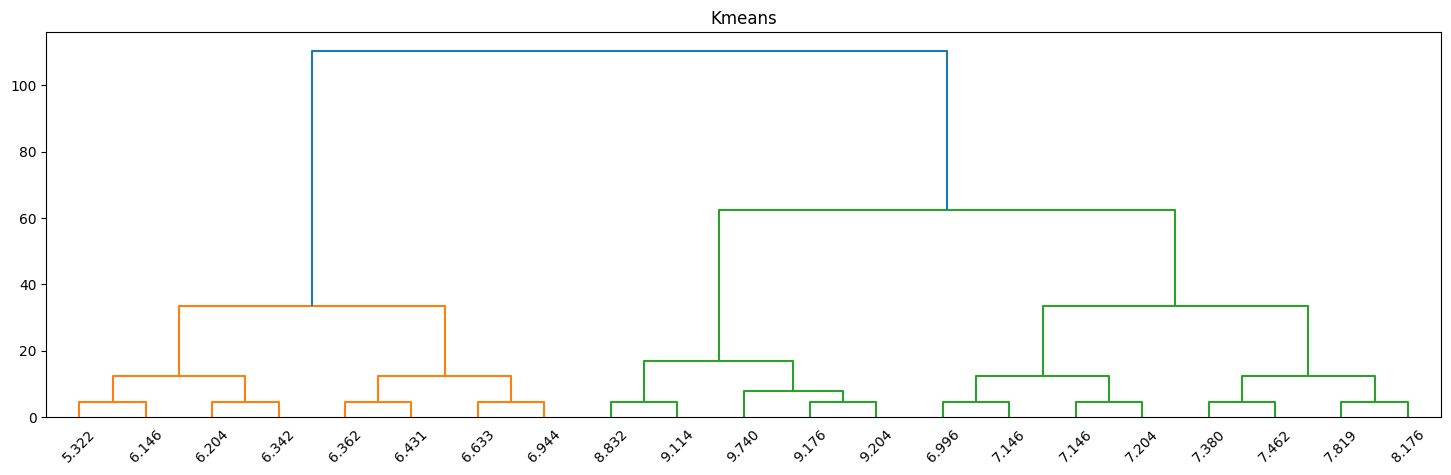

In [37]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
lab = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
lab2 = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]
lab2 = sorted(lab2, key=float)
plt.figure(figsize=(18,5))
plt.title("Kmeans")
d = shc.dendrogram(shc.linkage(similarity_kmeans, method = "ward"), labels = lab2)

In [38]:
print(similarity_kmeans)
prueba=similarity_kmeans.tolist()

nombre = input("Escriba el nombre del arreglo: ")
with open(f"{nombre}.txt", 'w') as n:
  n.write(str(prueba))

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20.]
 [ 1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
  17. 18. 19.]
 [ 2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.
  16. 17. 18.]
 [ 3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.
  15. 16. 17.]
 [ 4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.
  14. 15. 16.]
 [ 5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.
  13. 14. 15.]
 [ 6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.
  12. 13. 14.]
 [ 7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
  11. 12. 13.]
 [ 8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.
  10. 11. 12.]
 [ 9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
   9. 10. 11.]
 [10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.
   8.  9. 10.]
 [11. 10.  9.  8.  7.

<ipython-input-16-93c7f306aa26>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(similarity_dbscan, method = "ward"), labels = lab)


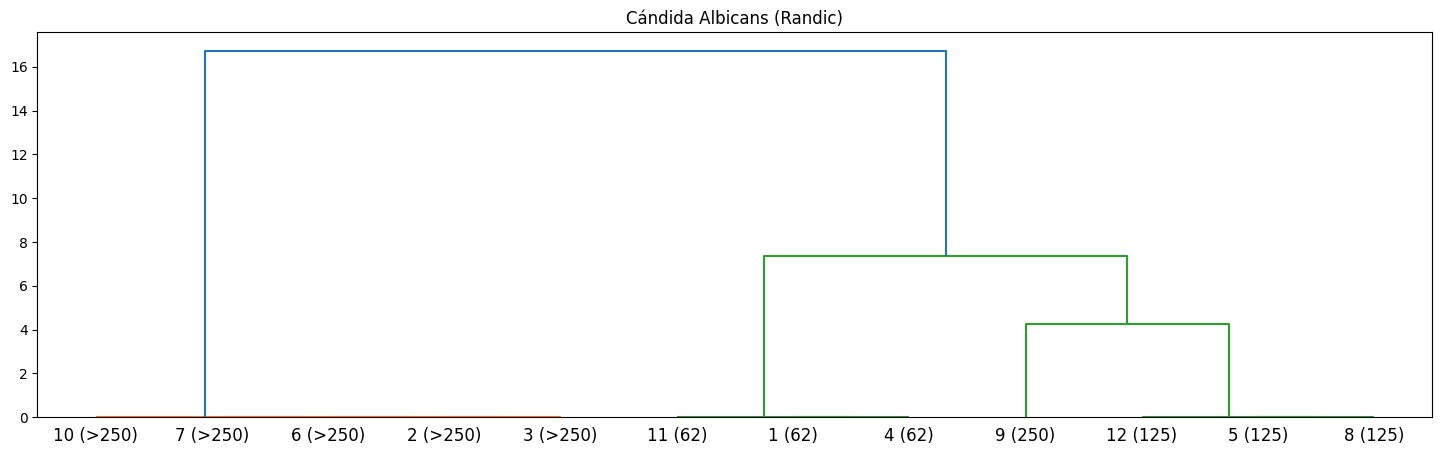

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Cándida Albicans (Randic)")
d = shc.dendrogram(shc.linkage(similarity_dbscan, method = "ward"), labels = lab)

<ipython-input-17-c5a795636455>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(similarity_agglomerative, method = "ward"), labels = lab)


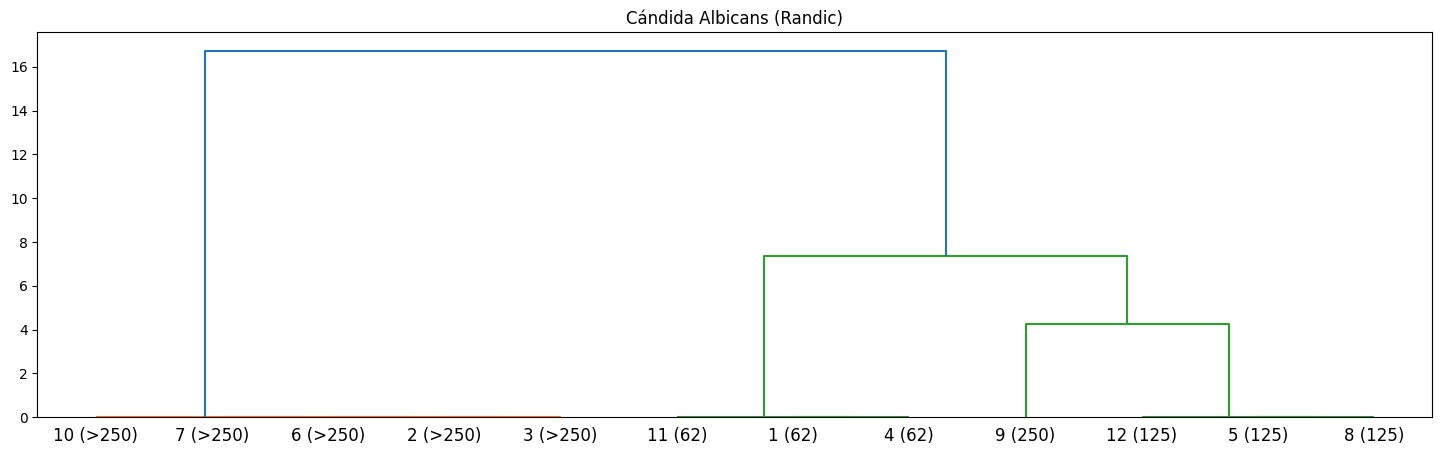

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Cándida Albicans (Randic)")
d = shc.dendrogram(shc.linkage(similarity_agglomerative, method = "ward"), labels = lab)

In [41]:
import numpy as np
import pandas as pd
import glob
from natsort import natsorted

def calcular_distancia_frobenius(matriz_referencia, matriz_comparacion):
    diferencia = matriz_referencia - matriz_comparacion
    distancia_frobenius = 1/(1+np.linalg.norm(diferencia))
    return distancia_frobenius

directorio = "/content/"
referencia = "Kmeans_esteroides.txt"
#referencia = input("Ingrese el nombre de la matriz de referencia (terminado en .txt): ")
with open(directorio + referencia, 'r') as f:
    matriz_referencia_str = f.read()
    matriz_referencia = np.array(eval(matriz_referencia_str))
patron_txt = "*.txt"
matrices_txt = glob.glob(directorio + patron_txt)

# Lista para almacenar las distancias
distancias_frobenius = []

for archivo in matrices_txt:
    with open(archivo, 'r') as f:
        matriz_comparacion_str = f.read()
        matriz_comparacion = np.array(eval(matriz_comparacion_str))
        distancia = calcular_distancia_frobenius(matriz_referencia, matriz_comparacion)
        distancias_frobenius.append((archivo, distancia))

for archivo, distancia in distancias_frobenius:
    print(f"Distancia de Frobenius entre {archivo} y la matriz de referencia: {distancia}")



Distancia de Frobenius entre /content/Lowdin.txt y la matriz de referencia: 5.2952453080267386e-05
Distancia de Frobenius entre /content/CM5.txt y la matriz de referencia: 4.720188998094425e-05
Distancia de Frobenius entre /content/Bickelhaupt.txt y la matriz de referencia: 0.0003825163253684711
Distancia de Frobenius entre /content/Kmeans_esteroides.txt y la matriz de referencia: 1.0
Distancia de Frobenius entre /content/RESP.txt y la matriz de referencia: 7.200711383756407e-07
Distancia de Frobenius entre /content/AIM.txt y la matriz de referencia: 6.667419469491679e-06
Distancia de Frobenius entre /content/Becke.txt y la matriz de referencia: 5.047652528666102e-06
Distancia de Frobenius entre /content/Voronoi.txt y la matriz de referencia: 4.1744836371743434e-05
Distancia de Frobenius entre /content/Mulliken.txt y la matriz de referencia: 2.4350339100097186e-05
Distancia de Frobenius entre /content/Kollmann.txt y la matriz de referencia: 7.931996617913394e-08
Distancia de Frobenius 